<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Combinatorics 2: Combinatorial probabilities


## Table of contents

- [Optimal network](#network)
- [The birthday paradox](#birthday)
- [Coincidences](#coincidence)


In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="network"></a>
### Exercise 1. Optimal network

<i>(This exercise is the numerical illustration of an Exercise of "Discrete Mathematics" in Bachelor 1.)</i>

We study a network of $10$ roads joining cities $A,B,C$. The network $N_k$  ($1\leq k\leq 9$) consists of $k$ roads $A\to B$, and $10-k$ roads $B\to C$, here is an example for $n=4$: 

<img src="figures/Network_k4.jpg" style="width: 350px;"/>

We assume that in Winter each road is independently closed (blocked by snow) with probability $p$. We ask for the "optimal" network, in the following sense: choose $k$ so that
$$
p\mapsto g_k(p)=\mathbb{P}(\text{ there exists an open path $A\to B\to C$ in network }N_k)
$$
is maximized.

<div markdown=1 class="DoIt">
Find the formula for $\mathbb{P}(\text{ there exists an open path }A\to B)$, and deduce the formula for $g_k(p)$.

<div markdown=1 class="Answers"> 
By independence we have
$$
g_k(p)=\mathbb{P}(\text{ there exists an open path }A\to B) \times \mathbb{P}(\text{ there exists an open path }B\to C)
$$
We have $\{A \to B\}$ unless the $k$ paths from $A$ to $B$ are all closed, hence
$$
\mathbb{P}(\text{ there exists an open path }A\to B)=1-(1-p)^k.
$$
Finally,
$$
g_k(p)=(1-(1-p)^k)\times (1-(1-p)^{10-k}).
$$

One can check that for every $p$ we have $g_k=g_{10-k}$. (By the way, why is this obvious?).

<div markdown=1 class="DoIt"> 
Write a short program which plots $g_1,g_2,\dots,g_5$ on the same figure.

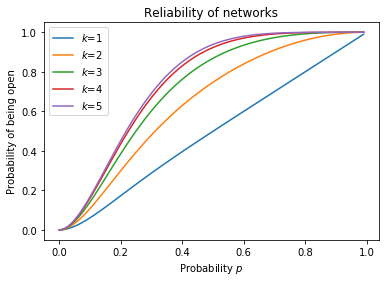

In [8]:
RangeOf_p=np.arange(0,1,0.01)
for k in range(1,6):
    g=[(1-(1-p)**k)*(1-(1-p)**(10-k)) for p in RangeOf_p]
    plt.plot(RangeOf_p,g,label='$k$='+str(k)+' ')
    
plt.xlabel('Probability $p$'),plt.ylabel('Probability of being open')
plt.legend()
plt.title('Reliability of networks')
plt.show()

<div markdown=1 class="DoIt"> 
Conclude: for a fixed $p$, what is the most reliable network?

<div markdown=1 class="Answers"> According to the above script, $N_5$ is the most reliable network, no matter the value of $p$.

<a id="birthday"></a>

### Exercise 2. The birthday paradox

<img src="figures/Birthday.png" alt="vanderWaals" style="width: 200px;"/>
 

We consider the following problem. Consider a group of $n\geq 2$ people, we assume that their birthdays $X_1,\dots,X_n$ are uniformly distributed in $\{1,2,\dots,k\}$, with $k=365$. The <i>birthday paradox</i> asks for the probability of the event

$$
E_{n,k} =\{ \text{ there exist }i\neq j, 1\leq i,j \leq n; X_i=X_j\}.
$$

Obviously we have that $\mathbb{P}(E_{n,365})=1$ as soon as $n\geq 365$. The so-called <i>paradox</i> is that a high probability is reached for quite small values of $n$.

<div markdown=1 class="DoIt"> Let $F_{n,k}$ be the complementary event of $E_{n,k}$.

1. Compute $\mathbb{P}(F_{1,k})$ and $\mathbb{P}(F_{2,k})$. (Justify carefully your answer for $F_{2,k}$.)
2. Compute
$$
\mathbb{P}(F_{n,k}|\ F_{n-1,k}),
$$
and deduce the formulas for $\mathbb{P}(F_{n,k}), \mathbb{P}(E_{n,k})$.

<div markdown=1 class="Answers"> 
1. We obviously have $\mathbb{P}(F_{1,k})=1$.

One writes
\begin{align*}
\mathbb{P}(F_{2,k})&=\mathbb{P}(X_1\neq X_2)\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i,X_1\neq X_2)\qquad \text{(law of total probabilities)}\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i,X_2\neq i)\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i)\mathbb{P}(X_2\neq i)\qquad \text{(independence)}\\
&=\sum_{i=1}^k \frac{1}{k} \frac{k-1}{k}=\frac{k-1}{k}\qquad \text{(the sum does not depend on $i$)}.
\end{align*}
Therefore $\mathbb{P}(F_{2,k})=(k-1)/k$.
2. If the event $F_{n-1,k}$ occurs then all the $X_i$'s are distinct up to $i=n-1$. Then $F_{n,k}$ occurs if and only if $X_n$ takes one of the $k-(n-1)$ remaining values:
$$
\mathbb{P}(F_{n,k}|\ F_{n-1,k})= \frac{k-(n-1)}{k}.
$$
By induction we easily obtain that
$$
\mathbb{P}(F_{n,k})=\frac{k}{k}\times \frac{k-1}{k}\times \frac{k-2}{k} \times \dots \times \frac{k-(n-1)}{k}.
$$
and $\mathbb{P}(E_{n,k})=1-\mathbb{P}(F_{n,k})$.

<div markdown=1 class="DoIt"> Write a function that takes $n,k$ as inputs and returns $\mathbb{P}(E_{n,k})$.

In [11]:
def TwoIdenticalBirthdays(n,k):
    # returns the probability P(E_{n,k})
    Vector=np.arange(k-n+1,k+1) # computes [k-n+1,...,k]
    Quotient=Vector/(k+0.0) # '+0.0' forces the float division
    Product= np.prod(Quotient)
    return 1-Product

# Test : (for n=8,k=365 this should return 0.0743...)
print('For n=8, two identical birthdays with probability '+str(TwoIdenticalBirthdays(8,365)))


For n=8, two identical birthdays with probability 0.0743352923517


<div markdown=1 class="DoIt"> 
1. Plot $n\mapsto \mathbb{P}(E_{n,365})$ for $n=2$ to $n=100$.
2. Find the smallest $n$ such that $\mathbb{P}(E_{n,365})\geq 0.95$.

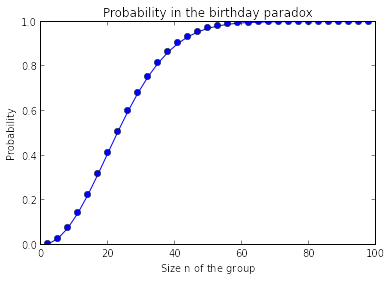

-----------------
Question 2
For n = 47, more than 0.95% chance
-----------------


In [21]:
# Question 1
BirthdayParadox = [TwoIdenticalBirthdays(n,365) for n in range(2,100,3)]
plt.plot(range(2,100,3),BirthdayParadox,'o-')
plt.xlabel('Size $n$ of the group'),plt.ylabel('Probability')
plt.title('Probability in the birthday paradox')
plt.show()

# Question 2

BirthdayParadox = [TwoIdenticalBirthdays(n,365) for n in range(1,100)]
i=1
while BirthdayParadox[i]<0.95:
    i=i+1
print('-----------------')
print('Question 2')
print('For n = '+str(i+1)+', more than 0.95% chance')
print('-----------------')




<a id="coincidence"></a>

### Exercise 3. The lottery coincidence

<i>(Inspired by <a href="https://www4.stat.ncsu.edu/~stefanski/NC%20Lottery%20Coincidence.pdf">The North-Carolina Lottery Coincidence (Leonard Stefanski)</a>.)</i>

<!--<i>(Inspired by <a href="http://www.jordanellenberg.com/how-not-to-be-wrong/">How Not to Be Wrong (Jordan Ellenberg), Penguin Group Press (2014)</a>.)</i>
-->

On July 9th, 2007, the North Carolina Cash 5 lottery numbers came up $4$, $21$, $23$, $34$, $39$. Two days later (the lottery runs every day), the same five numbers came up again. This seems very unlikely, the aim of this exercise is to show that this is less extraordinary than expected as first sight.

The rules of Cash 5 are the following: every day five distinct numbers are picked uniformly (order does not matter) between $1$ and $39$. More formally, at each drawing we are given a random variable $X$ uniform in the set $C_5$, where $C_5$ is the set of all the $\binom{39}{5}=575757$ combinations.

As a warm-up we will first estimate the probability that the same combination is picked twice in two days (instead of twice in three days).

<div markdown=1 class="DoIt"> 
Let $X_1,X_2,\dots $ be a sequence of independent random variables uniform in $C_5$. 
Put $k=\mathrm{card}(C_5)=\binom{39}{5}$.<br>
Let $A_n$ denote the event

$$
A_n=\{X_n\neq X_{n+1}\}.
$$

1. Compute $\mathbb{P}(A_1)$.

2. Compute
$$
\mathbb{P}\left(A_{n-1} |\ A_{1}\cap A_2\cap \dots \cap A_{n-2}\right).
$$

3. Let $n\geq 2$, compute the probability $p_n$ that in $n$ days there are no two consecutive drawings which are identical.


<div markdown=1 class="Answers"> 
1. This is the birthday paradox with $n=1$, $\mathbb{P}(A_1)=\frac{k-1}{k}$.
2. Assume that the event $A_1,A_2,\dots,A_{n-2}$ occur. The same reasoning as above shows that, no matter the values of $X_1,\dots,X_{n-1}$, we have that $A_{n-1}=\{X_{n-1}\neq X_n\}$ with probability $(k-1)/k$.
3. We have that
$$
p_{n}= \mathbb{P}\left(A_1 \text{ and } A_2 \text{ and } A_3 \text{ and }  \dots A_{n-1}\right).
$$
By induction
$$
p_n=\left((k-1)/k\right)^{n-1}.
$$

<div markdown=1 class="DoIt"> 

In the cell below, write a function `NotTwoConsecutiveIdenticalDrawings(n)` which takes $n$ as input and returns $p_n$.

In [5]:
k=575757+0.0 # Number of combinations
def NotTwoConsecutiveIdenticalDrawings(n):
    # returns the probability p_n
    return (1-1/k)**(n-1)

# Test: for n=10000 this should return 0.98278...
NotTwoConsecutiveIdenticalDrawings(10000)                                        
    

0.9827832155669857

Fine, this is indeed very small as long as, say, $n\leq 10000$ (about $10$ years of daily lotteries).

We now turn to the actual lottery problem: estimating the probability that there is the same drawing twice in three days.


<div markdown=1 class="DoIt"> 
Let $B_n$ denote the event

$$
B_n=\{X_n, X_{n+1},X_{n+2}\text{ are all distinct}\}.
$$

1. Write $\mathbb{P}(B_1)$ in terms of $k=\binom{39}{5}$.<br>

2. Compute 
$$
\mathbb{P}\left(B_{n-2} | B_{1}\cap B_2\cap \dots \cap B_{n-3}\right).
$$
3. Deduce from above the probability $q_n$ that, in $n\geq 3$ days, there are no twice the same drawing in three consecutive days.


<div markdown=1 class="Answers"> 
1. This is just the birthday paradox for $n=3$.
2. If we know that $B_1,B_2,\dots,B_{n-3}$ occur then, no matter the values of $X_1,X_2,\dots,X_{n+1}$, we have that $\{X_n, X_{n+1},X_{n+2}\text{ are all distinct}\}$ with probability $\frac{k(k-1)(k-2)}{k^3}$ as well.
3. By induction one finds
$$
q_{n}=\frac{k(k-1)}{k^2}\left(\frac{k-2}{k}\right)^{n-2}.
$$

In [6]:
k=575757+0.0
def NotTwoIdenticalDrawingsInThreeDays(n):
    # returns the probability q_n
    return ((k*(k-1))/(k*k))*((k-2)/(k))**(n-2)

# Test: for n=50000 this should return 0.840566...
NotTwoIdenticalDrawingsInThreeDays(10000)                          
    

0.9658644972252401

<div markdown=1 class="DoIt"> 
Assume that lotteries similar to the Cash 5 Lottery take place $1200$ times in five years, in $50$ cities across the US.

Compute the probability that for five years there is at least one lottery in which there are twice the same drawing in three consecutive days. Write the answer in terms of `NotTwoIdenticalDrawingsInThreeDays` and compute the numerical value in the cell above.

In [1]:
1-NotTwoIdenticalDrawingsInThreeDays(1200)**20                              

NameError: name 'NotTwoIdenticalDrawingsInThreeDays' is not defined